In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [53]:
def get_preferred_period(directory, hemi = 'all', stimulus_class = 'angular'):
    path= directory
    subjects = os.listdir("F:\\\\ds003812-download\\\\sfp_fully_processed_data\\\\derivatives\\\\first_level_analysis\\\\stim_class\\\\bayesian_posterior")
    mean_preferred_period = np.empty((7,11))
    error_preferred_period = np.empty((7,11))
    file_name = ''

    for area in range(1,8):
        print(f"area {area}")
        preferred_period = np.empty((12,11))
                 
        for i,subject in enumerate(subjects):

            if hemi == 'all':
                file_name = f'tuning_bin_df_{area}_{subject}_sigma_full_summary.csv'
            elif hemi == 'left':
                file_name = f'tuning_bin_df_{area}_{subject}_sigma_full_summary_left.csv'
            else:
                file_name = f'tuning_bin_df_{area}_{subject}_sigma_full_summary_right.csv'

            df = pd.read_csv(f"{path}\\{area}\\{file_name}")               
            df = df[(df['frequency_type']=='local_sf_magnitude') & (df['stimulus_superclass']==stimulus_class)][['eccen','preferred_period']]
            df =df.drop_duplicates('eccen')
            preferred_period[i,:]=df['preferred_period']
        mean_preferred_period[area-1,:] = np.mean(preferred_period, axis=0)
        error_preferred_period[area-1,:] = np.std(preferred_period, axis=0)/np.sqrt(12)

    return mean_preferred_period, error_preferred_period

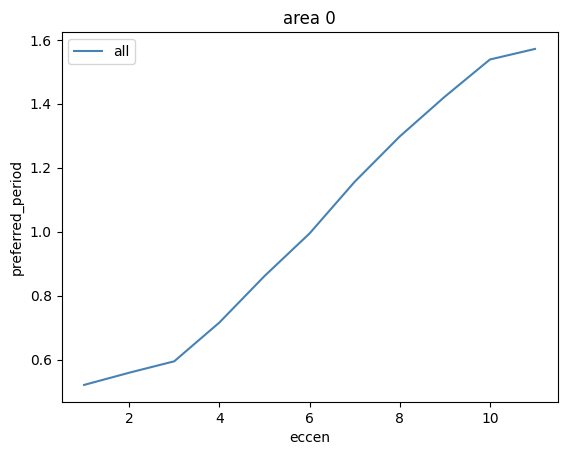

In [27]:
    plt.plot(np.arange(1,12,1), mean_preferred_period[i,:],color='steelblue', label='all')    
    plt.xlabel('eccen')
    plt.ylabel('preferred_period')
    plt.title(f"area {i}")
    plt.legend()
    plt.show()

area 1
area 2
area 3
area 4
area 5
area 6
area 7
area 1
area 2
area 3
area 4
area 5
area 6
area 7


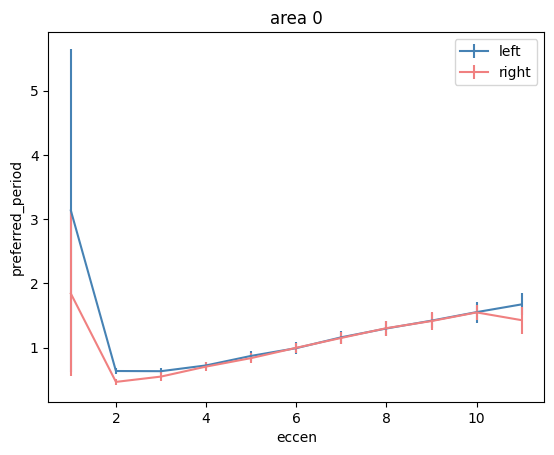

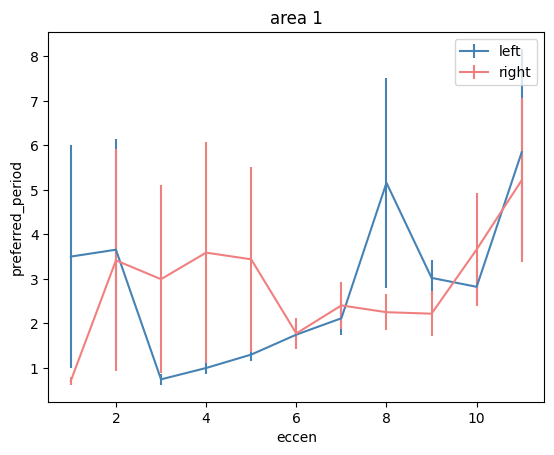

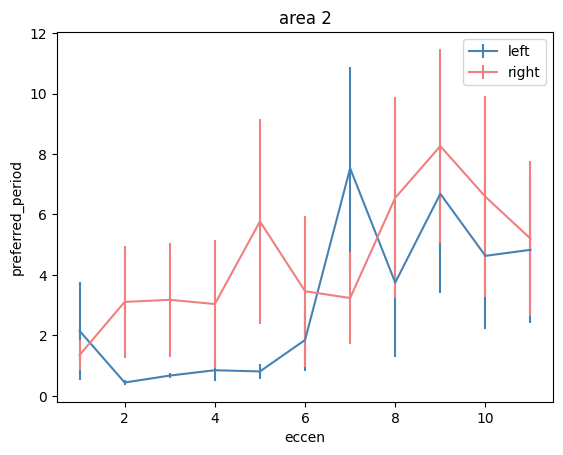

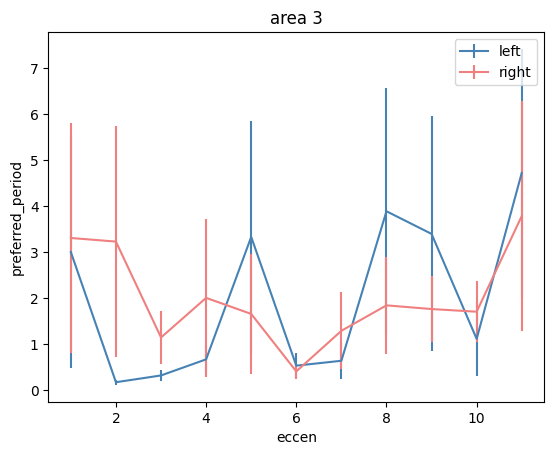

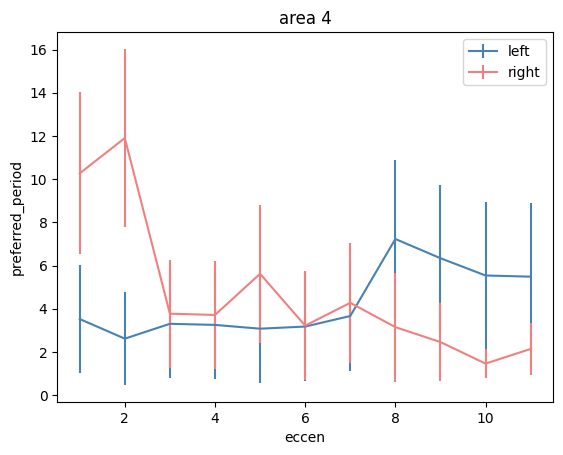

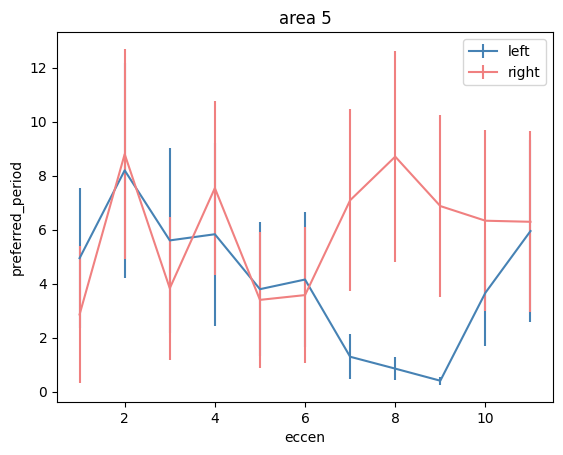

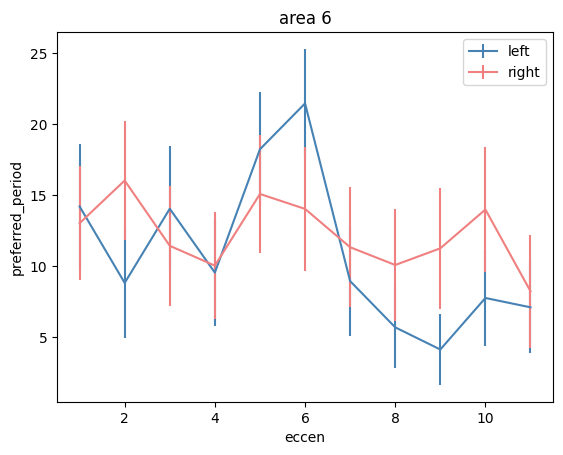

In [54]:
path = "F:\\ds003812-download\\results\\tuning\\tuning_bins"
mean_left, error_left = get_preferred_period(path, hemi = 'left')
mean_right, error_right = get_preferred_period(path,hemi = 'right')


for i in range(mean_left.shape[0]):

    plt.errorbar(np.arange(1,12,1), mean_left[i,:],yerr=error_left[i,:],color='steelblue', label='left')
    plt.errorbar(np.arange(1,12,1),mean_right[i,:], yerr=error_right[i,:], color='lightcoral', label = 'right')
    plt.xlabel('eccen')
    plt.ylabel('preferred_period')
    plt.title(f"area {i}")
    plt.legend()
    plt.show()


In [55]:
def get_sigma(directory, hemi = 'all', stimulus_class = 'angular'):
    path= directory
    subjects = os.listdir("F:\\\\ds003812-download\\\\sfp_fully_processed_data\\\\derivatives\\\\first_level_analysis\\\\stim_class\\\\bayesian_posterior")
    mean_preferred_period = np.empty((7,11))
    error_preferred_period = np.empty((7,11))
    file_name = ''

    for area in range(1,8):
        print(f"area {area}")
        preferred_period = np.empty((12,11))
                 
        for i,subject in enumerate(subjects):

            if hemi == 'all':
                file_name = f'bin_df_{area}_{subject}_sigma_full_summary.csv'
            elif hemi == 'left':
                file_name = f'bin_df_{area}_{subject}_sigma_full_summary_left.csv'
            else:
                file_name = f'bin_df_{area}_{subject}_sigma_full_summary_right.csv'

            df = pd.read_csv(f"{path}\\{area}\\{file_name}")               
            df = df[(df['stimulus_superclass']==stimulus_class)][['eccen','sigma']]
            df =df.drop_duplicates('eccen')
            preferred_period[i,:]=df['sigma']
        mean_preferred_period[area-1,:] = np.mean(preferred_period, axis=0)
        error_preferred_period[area-1,:] = np.std(preferred_period, axis=0)/np.sqrt(12)

    return mean_preferred_period, error_preferred_period
    

area 1
area 2
area 3
area 4
area 5
area 6
area 7
area 1
area 2
area 3
area 4
area 5
area 6
area 7


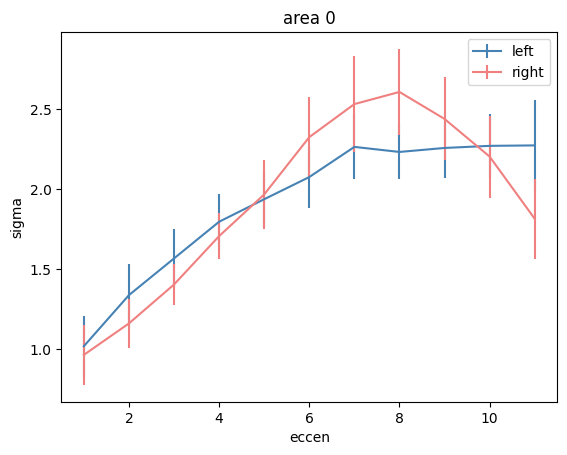

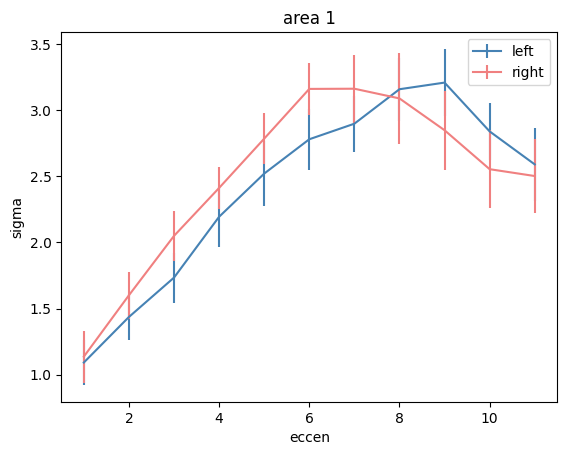

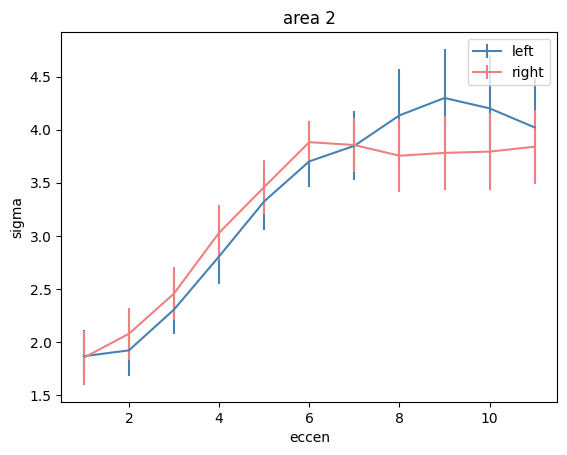

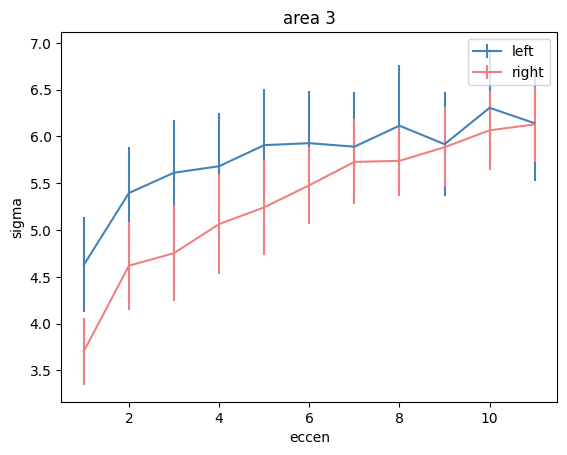

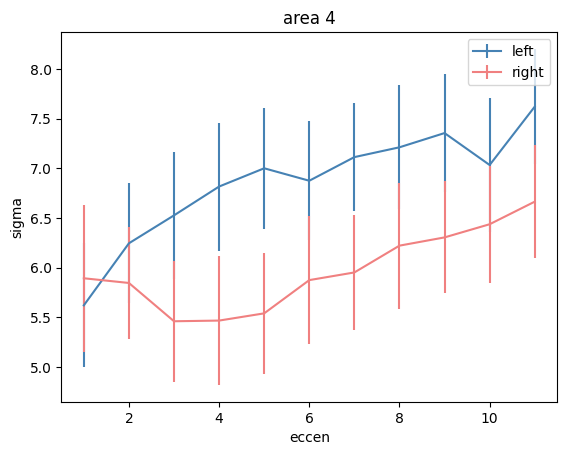

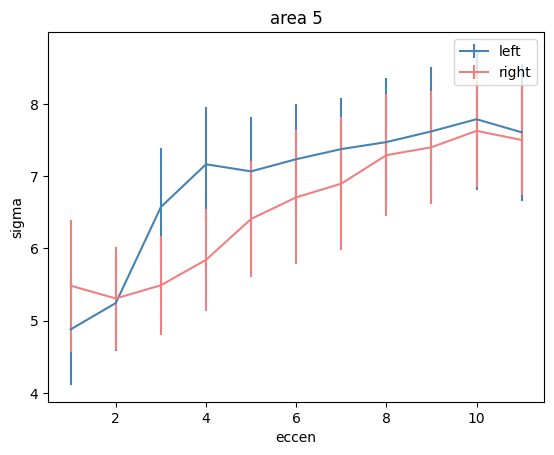

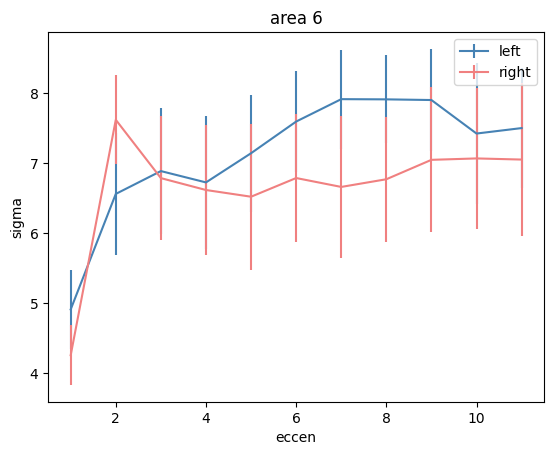

In [56]:
path = "F:\\ds003812-download\\results\\bins"
mean_left, error_left = get_sigma(path, hemi='left',stimulus_class='angular')
mean_right, error_right = get_sigma(path, hemi='right',stimulus_class='angular')

for i in range(mean_left.shape[0]):

    plt.errorbar(np.arange(1,12,1), mean_left[i,:],yerr=error_left[i,:],color='steelblue', label='left')
    plt.errorbar(np.arange(1,12,1),mean_right[i,:], yerr=error_right[i,:], color='lightcoral', label = 'right')
    plt.xlabel('eccen')
    plt.ylabel('sigma')
    plt.title(f"area {i}")
    plt.legend()
    plt.show()


In [61]:
def get_table(stimulus_class = 'angular'):

    side = []
    subject = []
    sigma = []
    preferred_period = []
    eccen = []
    roi = []

    path= "F:\\ds003812-download\\results\\"
    subjects = os.listdir("F:\\\\ds003812-download\\\\sfp_fully_processed_data\\\\derivatives\\\\first_level_analysis\\\\stim_class\\\\bayesian_posterior")
    print(subjects)
    for area in range(1,8):
        for j,sub in enumerate(subjects):
            for i,s in enumerate(['left','right']):
            
                df = pd.read_csv(f"{path}\\bins\\{area}\\bin_df_{area}_{sub}_sigma_full_summary_{s}.csv")               
                df = df[(df['stimulus_superclass']==stimulus_class)][['eccen','sigma']]
                df =df.drop_duplicates('eccen')
                
                df_tuning = pd.read_csv(f"{path}\\tuning\\tuning_bins\\{area}\\tuning_bin_df_{area}_{sub}_sigma_full_summary_{s}.csv")               
                df_tuning = df_tuning[(df_tuning['frequency_type']=='local_sf_magnitude') & (df_tuning['stimulus_superclass']==stimulus_class)][['eccen','preferred_period']]
                df_tuning =df_tuning.drop_duplicates('eccen')

                side.extend([i]*len(df_tuning['eccen']))
                subject.extend([j + 1]*len(df_tuning['eccen']))
                roi.extend([area]*len(df_tuning['eccen']))
                eccen.extend(np.arange(1.5,12.5,1))
                preferred_period.extend(df_tuning['preferred_period'])
                sigma.extend(df['sigma'])


    print(len(side))
    print(len(roi))
    print(len(subject))
    print(len(preferred_period))
    print(len(eccen))
    print(len(sigma))

    data = {'roi':roi,'side':side, 'eccen':eccen, 'subject':subject, 'preferred_period':preferred_period, 'sigma':sigma}

    new_df = pd.DataFrame(data)
    new_df.to_csv('tuning_bins.csv')
    
get_table()           



['sub-wlsubj001', 'sub-wlsubj006', 'sub-wlsubj007', 'sub-wlsubj045', 'sub-wlsubj046', 'sub-wlsubj062', 'sub-wlsubj064', 'sub-wlsubj081', 'sub-wlsubj095', 'sub-wlsubj114', 'sub-wlsubj115', 'sub-wlsubj121']
1848
1848
1848
1848
1848
1848


In [69]:
tab = pd.read_csv('tuning_bins.csv')

for r in range(1,8):
    print(f"Area {r}")
    tab_roi = tab[(tab['roi']==r)]
    modelo_mixto = smf.mixedlm("preferred_period ~ side * eccen", tab_roi, groups=tab_roi["subject"])
    resultados_modelo = modelo_mixto.fit(maxiter=10000)
    # Imprimir los resultados del modelo
    print(resultados_modelo.summary())
    print(resultados_modelo.pvalues)

Area 1
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: preferred_period
No. Observations: 264     Method:             REML            
No. Groups:       12      Scale:              4.8010          
Min. group size:  22      Log-Likelihood:     -586.1998       
Max. group size:  22      Converged:          Yes             
Mean group size:  22.0                                        
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        1.274     0.441   2.887  0.004   0.409   2.139
side            -0.534     0.617  -0.867  0.386  -1.743   0.674
eccen            0.001     0.060   0.025  0.980  -0.117   0.120
side:eccen       0.056     0.085   0.660  0.509  -0.111   0.223
Group Var        0.056     0.055                               

Intercept     0.003888
side          0.386173
eccen 

c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python311\Lib\site-packages\statsmodels\r

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: preferred_period
No. Observations: 264     Method:             REML            
No. Groups:       12      Scale:              91.3148         
Min. group size:  22      Log-Likelihood:     -977.0522       
Max. group size:  22      Converged:          No              
Mean group size:  22.0                                        
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        6.490     2.261   2.871  0.004   2.059  10.921
side            -1.885     2.689  -0.701  0.483  -7.155   3.385
eccen           -0.374     0.263  -1.422  0.155  -0.890   0.141
side:eccen       0.578     0.372   1.554  0.120  -0.151   1.307
Group Var       17.956     1.071                               

Intercept     0.004096
side          0.483203
eccen        